In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Met_data = pd.read_csv('meteorology_2017_2019.csv',sep=",").drop_duplicates(keep='first')
Date_P   = pd.to_datetime(Met_data['DATE'])

Precip   = Met_data['PRCP'].values
Precip_monthly = [[] for i in range(12)]
for i in range(12):
    Precip_monthly[i][:] = [Precip[j] for j in range(len(Precip)) if Date_P[j].month == i+1]
Precip_monthly_mean = [sum(Precip_monthly[i])/ 3 for i in range(12)]

Temp = Met_data['TAVG'].values
Temp_monthly = [[] for i in range(12)]
for i in range(12):
    Temp_monthly[i][:] = [Temp[j] for j in range(len(Temp)) if Date_P[j].month == i+1]
Temp_monthly_mean = [sum(Temp_monthly[i])/len(Temp_monthly[i]) for i in range(12)]


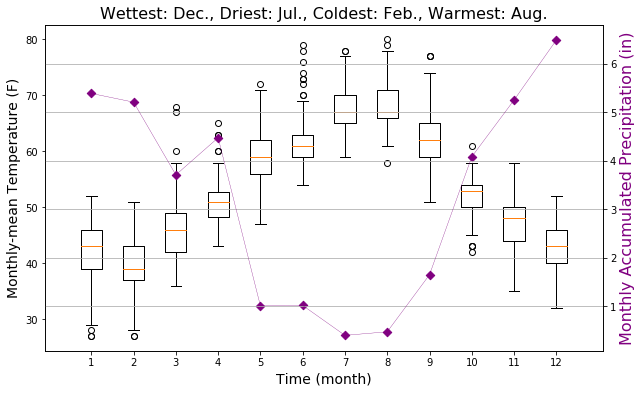

In [76]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.grid(True)

ax1.boxplot(Temp_monthly)
ax2.scatter(range(1,13),Precip_monthly_mean,marker='D',color = 'purple')
ax2.plot(range(1,13),Precip_monthly_mean,color = 'purple',linewidth = 0.3)

ax1.set_xlabel('Time (month)', fontsize=14)
ax1.set_ylabel('Monthly-mean Temperature (F)', fontsize=14)
ax2.set_ylabel('Monthly Accumulated Precipitation (in)', fontsize=16, color='purple')

TITLE = 'Wettest: Dec., Driest: Jul., Coldest: Feb., Warmest: Aug.'
ax1.set_title(TITLE, fontsize=16)

FILE_NAME = 'monthly_plot_precip_temp' + '.png'
plt.show()
#plt.savefig(FILE_NAME, format='png', dpi=600)


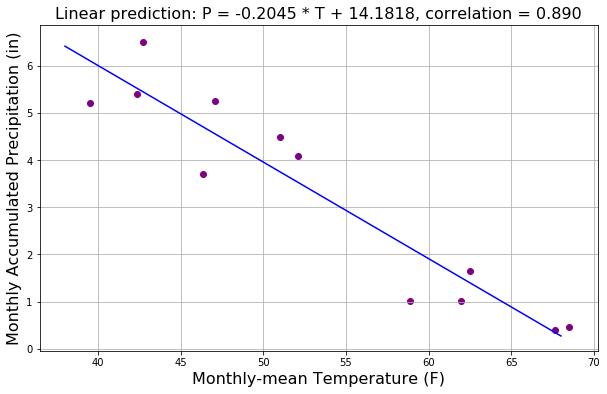

In [77]:
#Temp_anomaly = Temp_monthly_mean - np.nanmean(Temp_monthly_mean)
#Precip_anomaly = Precip_monthly_mean - np.nanmean(Precip_monthly_mean)
#plt.scatter(Temp_anomaly, Precip_monthly_mean, color = 'purple')

x = np.asarray(Temp_monthly_mean, dtype=np.float32).reshape(-1, 1)
y = np.asarray(Precip_monthly_mean, dtype=np.float32).reshape(-1, 1)
LinReg = LinearRegression()
LinReg.fit(x, y)
correlation = LinReg.score(x,y)
T = np.array(range(38,69))
P = LinReg.coef_ *  T + LinReg.intercept_

fig, ax1 = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.plot(T, P[0], color = 'b')
plt.scatter(Temp_monthly_mean, Precip_monthly_mean, color = 'purple')

ax1.set_xlabel('Monthly-mean Temperature (F)', fontsize=16)
ax1.set_ylabel('Monthly Accumulated Precipitation (in)', fontsize=16)

TITLE1 = 'Linear prediction: P = %.4f'% LinReg.coef_
TITLE2 = ' * T + %.4f, ' %LinReg.intercept_
TITLE3 = 'correlation = %.3f'% correlation
TITLE = TITLE1 + TITLE2 + TITLE3
ax1.set_title(TITLE, fontsize=16)

FILE_NAME = 'Prediction_Precip_Temp' + '.png'
plt.show()
#plt.savefig(FILE_NAME, format='png', dpi=600)


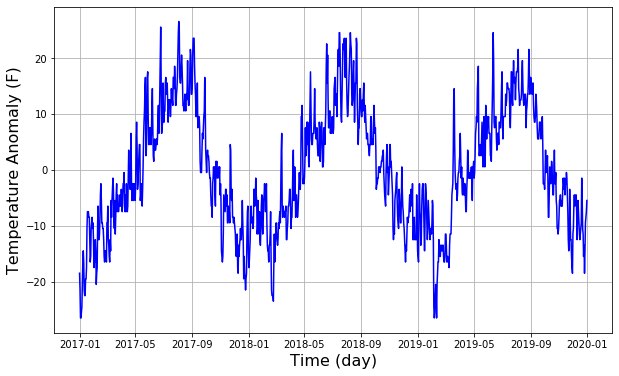

In [78]:
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.grid(True)

line1, = ax1.plot(Date_P, Temp - sum(Temp)/len(Temp),'b',label='Temp')
ax1.set_xlabel('Time (day)', fontsize=16)
ax1.set_ylabel('Temperature Anomaly (F)', fontsize=16)

#plt.legend(handles=[line1, line2], fontsize = 16)
FILE_NAME = 'Time_series' + '.png'
plt.show()
#plt.savefig(FILE_NAME, format='png', dpi=600)
